In [1]:
import sys
import numpy
import matplotlib.pyplot as plt, pandas as pd, matplotlib as mpl, random
def utkarshGrid(): plt.minorticks_on() ; plt.grid(color='grey',which='minor',linestyle=":",linewidth='0.1',) ; plt.grid(color='black',which='major',linestyle=":",linewidth='0.1',); return None
def utkarshGridAX(ax): ax.minorticks_on() ; ax.grid(color='grey',which='minor',linestyle=":",linewidth='0.1',) ; ax.grid(color='black',which='major',linestyle=":",linewidth='0.1',); return None
mpl.rcParams['legend.frameon'], mpl.rcParams['figure.autolayout'] = False, True,
colour = ["dodgerblue", "goldenrod", "crimson", "teal", "yellowgreen", "grey"]
plt.rcParams.update({"text.usetex": True, "font.family": "serif", "font.serif": ["Palatino"],})
def utkarshWrapper(): plt.legend();plt.utkarshGrid() ;plt.gca().tick_params(direction='in', which='both', right=True, top=True); plt.tight_layout(); return None
def utkarshWrapperAX(ax): utkarshGridAX(ax); ax.tick_params(direction='in', which='both', right=True, top=True); return None; 
plt.utkarshGrid = utkarshGrid; plt.utkarshWrapper = utkarshWrapper
def colour_sample(n = 2, col = colour, seed = 7236): random.seed(seed) ; return random.sample(colour, n)
plt.rcParams["image.cmap"] = "Set2" # I recommend, Set2, Dark2
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colour) # Use your own OR plt.cm.Set2.colors

In [2]:
%reload_ext autoreload
%autoreload 2
from run_inference import *
from postprocessing_functions import *

/Users/utkarsh/GitHub/P_NS/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
mcmc = None
path = f"results/prior"
mcmc = pickle_read(path)
prior_samples = infer_samples(mcmc)

In [4]:
mcmc = None
path = f"results/posterior"
mcmc = pickle_read(path)
posterior_samples = infer_samples(mcmc)
mcmc.print_summary()


                   mean       std    median      5.0%     95.0%     n_eff     r_hat
         A[0]      0.78      0.19      0.83      0.53      1.00    792.43      1.00
   alpha_1[0]     -2.16      0.88     -1.99     -3.84     -1.00    601.43      1.00
   alpha_2[0]     -1.51      0.24     -1.53     -1.89     -1.11    643.72      1.00
 alpha_chi[0]      1.29      0.26      1.22      1.00      1.62   1230.81      1.00
    beta_1[0]      1.44      0.54      1.36      0.53      2.26    951.99      1.00
    beta_2[0]      2.90      0.83      2.83      1.60      4.34    509.44      1.00
  beta_chi[0]      3.82      0.71      3.86      2.83      4.95    914.18      1.00
  eta_high[0]     28.87     12.82     29.58     10.26     49.43   1210.30      1.00
   eta_low[0]     25.74     13.72     25.75      3.70     45.74   1234.04      1.00
   eta_max[0]      5.46      1.80      5.27      2.65      8.63    879.24      1.00
   eta_min[0]     30.10     11.87     29.87     13.64     50.00   1317.32  

(array([  5.,   8.,   9.,  17.,  38.,  67.,  61., 110., 110., 115., 124.,
        105.,  85.,  60.,  43.,  20.,  11.,   6.,   3.,   3.]),
 array([-3.68048453, -3.2515492 , -2.82261386, -2.39367853, -1.9647432 ,
        -1.53580786, -1.10687253, -0.6779372 , -0.24900187,  0.17993347,
         0.6088688 ,  1.03780413,  1.46673947,  1.8956748 ,  2.32461013,
         2.75354547,  3.1824808 ,  3.61141613,  4.04035147,  4.4692868 ,
         4.89822213]),
 <BarContainer object of 20 artists>)

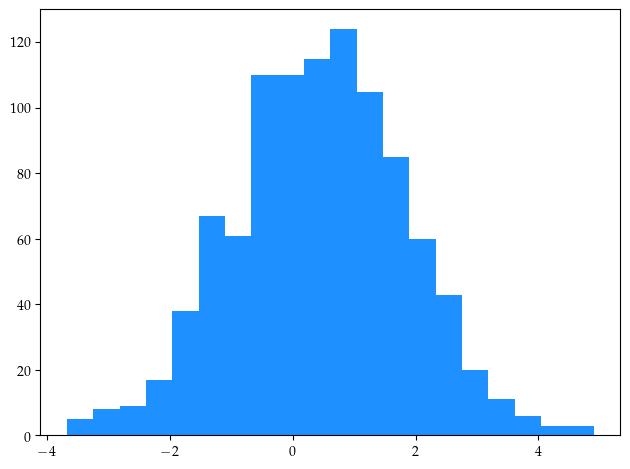

In [5]:
plt.hist(posterior_samples["kappa"], bins = 20)

In [ ]:
from config.mass1d_func import pdb_with_NG
from config.spin_func import prob_chi, prob_costilt
from config.distance_func import powerlaw_redshift

plot_p_m(posterior_samples, function=pdb_with_NG)
plot_p_pairing(posterior_samples)
plot_p_chi(posterior_samples, function=prob_chi)
plot_p_costilt(posterior_samples, function=prob_costilt)
plot_p_z(posterior_samples, function=powerlaw_redshift)
plt.show()

In [ ]:
import arviz as az
data = az.from_numpyro(mcmc)
var_names_lst = get_non_deterministic_params(mcmc)

if len(var_names_lst) >= 20:
    cut1 = var_names_lst[:20]
    cut2 = var_names_lst[20:]

    assert len(cut1) + len(cut2) == len(var_names_lst)

    az.plot_trace(data, var_names=cut1, compact=True)
    plt.savefig("results/trace1.png")
    az.plot_trace(data, var_names=cut2, compact=True)
    plt.savefig("results/trace2.png")
else:
    az.plot_trace(data, var_names=var_names_lst, compact=True)
    plt.savefig("results/trace.png")